In [1]:

##Read the Dataset##
import pandas as pd
#from scipy.constants import Rydberg
#from sklearn.externals.array_api_compat.cupy import concat

data = pd.read_csv('anemia.csv')
data.head(1421)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [2]:
## Handling missing values ##
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [3]:
##Let’s now check the size of our data set.##
data.shape

(1421, 6)

In [4]:
## Now, checking the null values present in the dataset, and adding up the overall null values we use the below function. ##
data.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

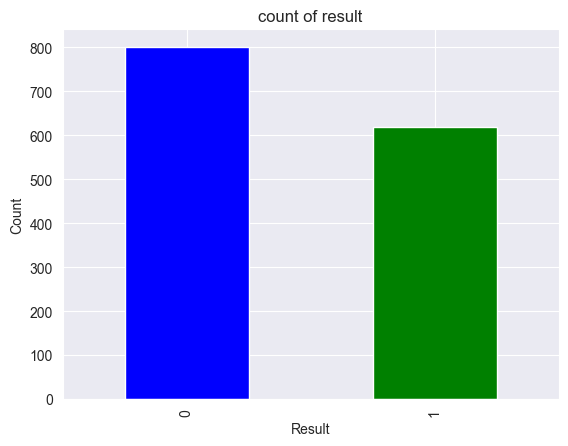

In [5]:
## Handling Imbalanced Values  ##
import matplotlib.pyplot as plot
result = data['Result'].value_counts()
result.plot(kind='bar',color=['blue','green'])
plot.xlabel('Result')
plot.ylabel('Count')
plot.title('count of result')
plot.show()

In [6]:
from sklearn.utils import resample

majorclass=data[data['Result']==0]
mainorclass=data[data['Result']==1]
majority_sample=resample(majorclass,replace=False,n_samples=len(mainorclass),random_state=42)
data=pd.concat([majority_sample,mainorclass])
print(data['Result'].value_counts())


Result
0    620
1    620
Name: count, dtype: int64


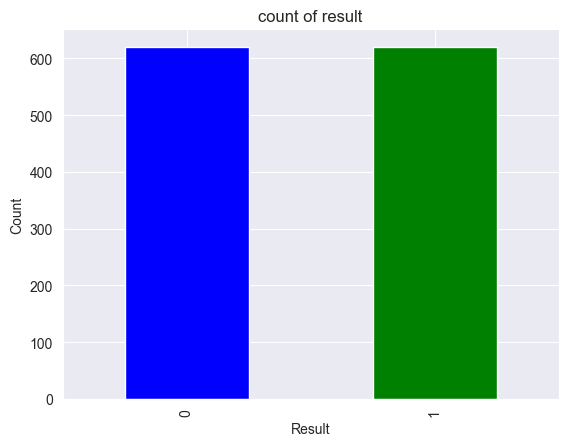

In [7]:
import matplotlib.pyplot as plot
result = data['Result'].value_counts()
result.plot(kind='bar',color=['blue','green'])
plot.xlabel('Result')
plot.ylabel('Count')
plot.title('count of result')
plot.show()


In [8]:
data.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.540323,13.218145,22.903952,30.277984,85.620968,0.500000
std,0.498573,1.976190,3.993624,1.394515,9.673794,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.100000,77.300000,0.000000
50%,1.000000,13.000000,22.700000,30.400000,85.300000,0.500000
75%,1.000000,14.900000,26.200000,31.500000,94.225000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


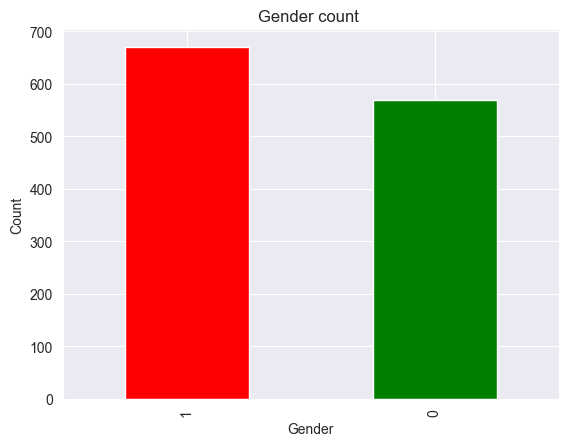

In [9]:
import matplotlib.pyplot as plot
result = data['Gender'].value_counts()
result.plot(kind='bar',color=['red','green'])
plot.xlabel('Gender')
plot.ylabel('Count')
plot.title('Gender count ')
plot.show()

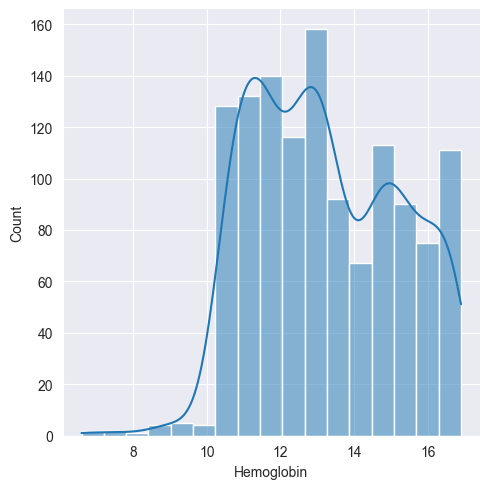

In [10]:
import seaborn as sns
sns.displot(data['Hemoglobin'],kde=True)

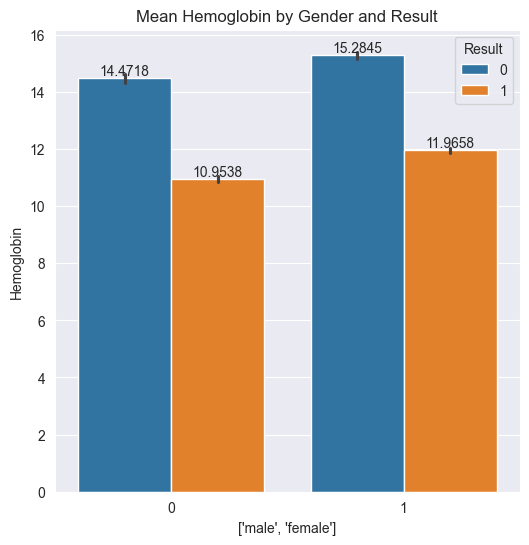

In [11]:
## Bivariate analysis ##
##these analysis b/w the tow feature #
plot.figure(figsize=[6,6])
df=sns.barplot(y=data['Hemoglobin'],x=data['Gender'],hue=data['Result'])
df.set(xlabel=['male','female'])
df.bar_label(df.containers[0])
df.bar_label(df.containers[1])
plot.title("Mean Hemoglobin by Gender and Result")
plot.show()

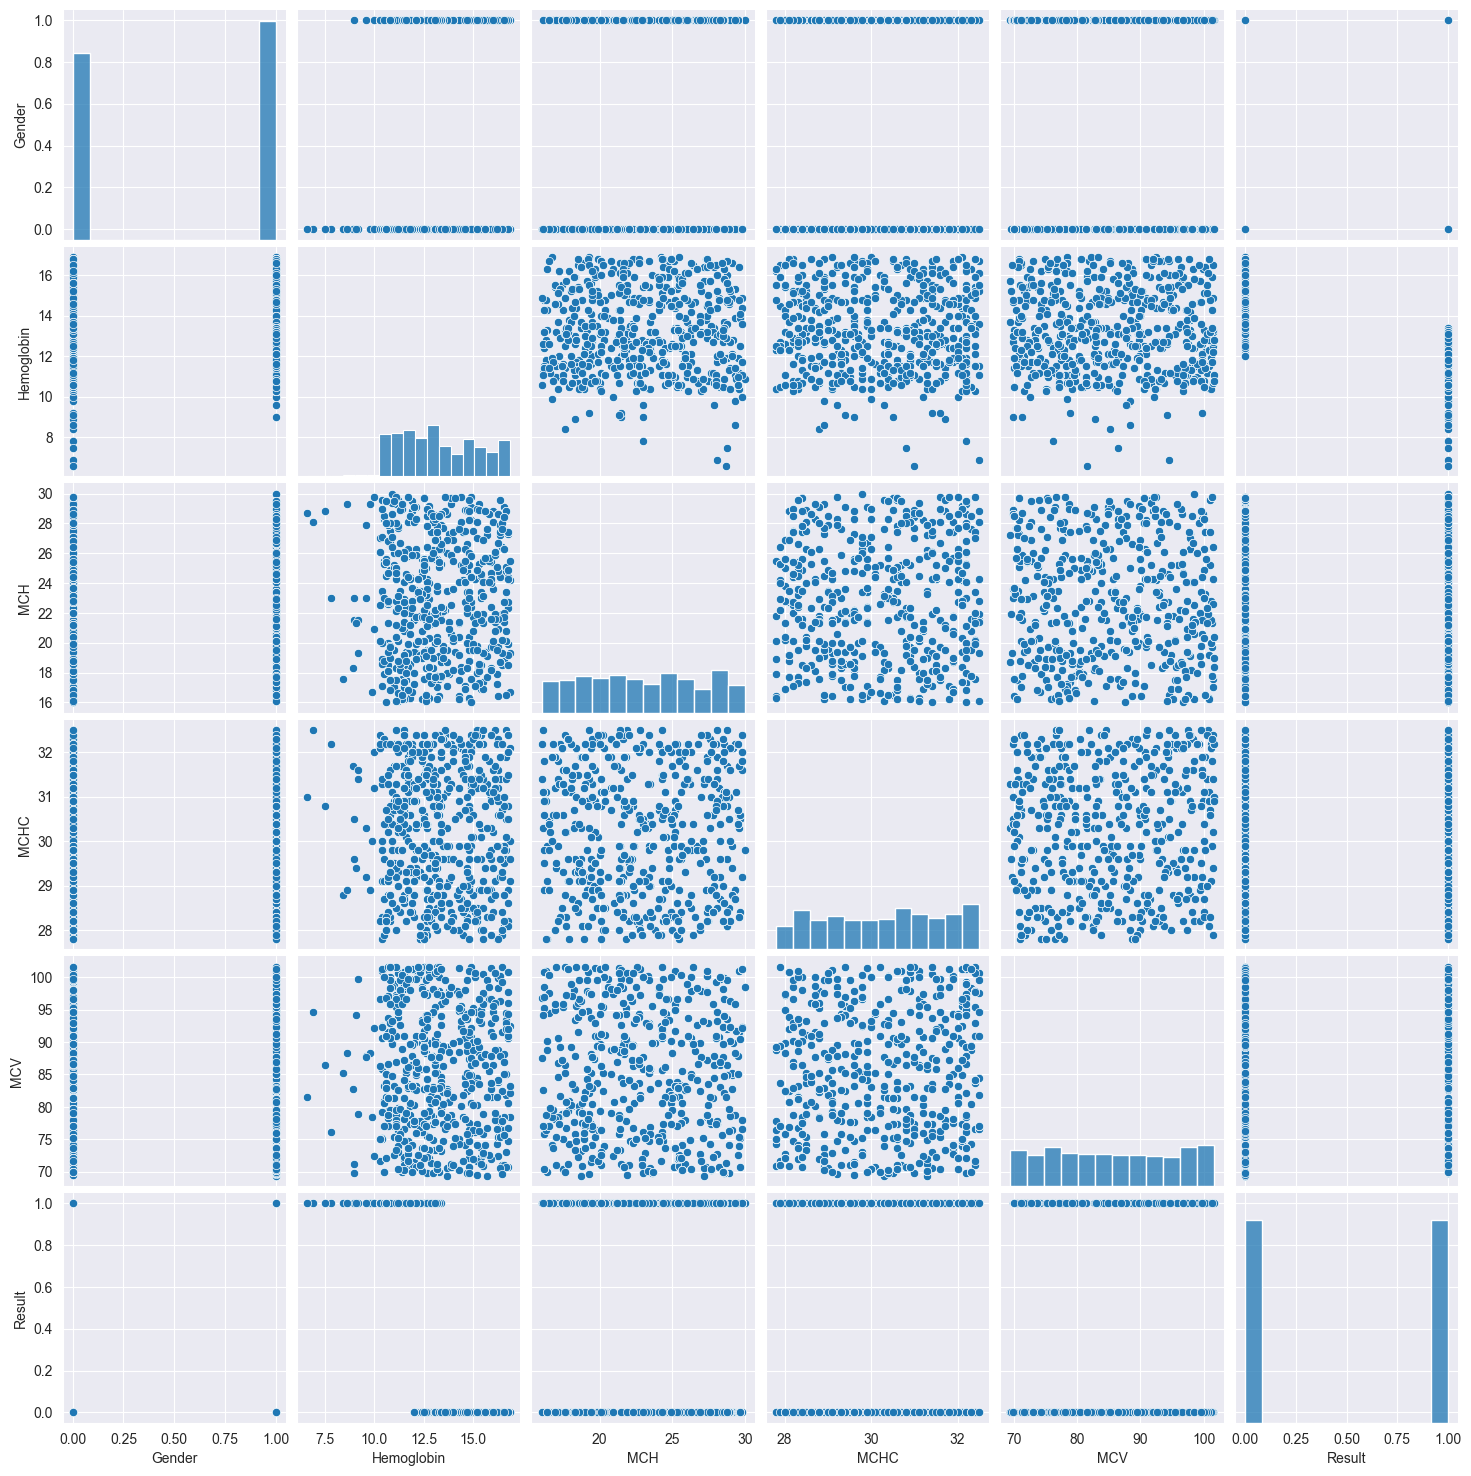

In [12]:
## Multivariate analysis ##
sns.pairplot(data)

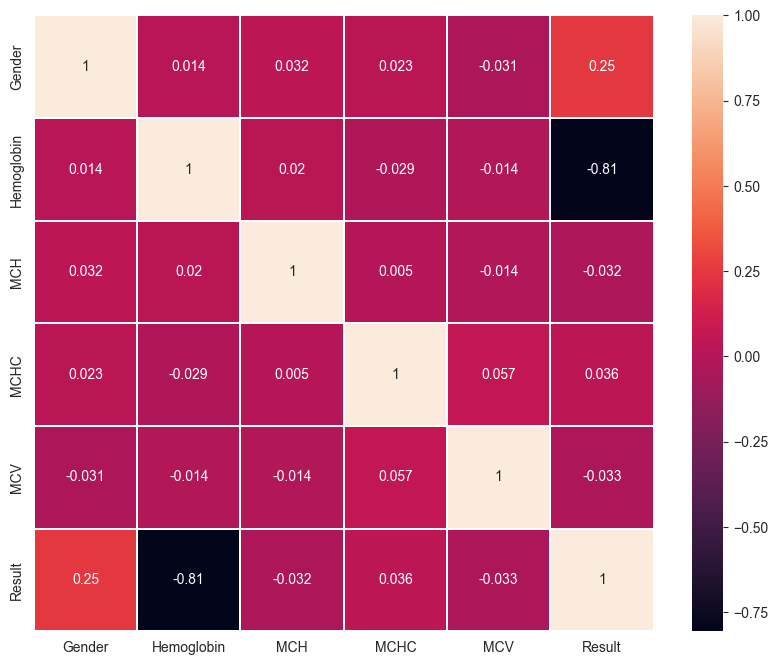

In [13]:
sns.heatmap(data.corr(),annot=True,linewidths=.2)
fig=plot.gcf()
fig.set_size_inches(10,8)
plot.show()

In [14]:
x=data.drop('Result',axis=1)
y=data['Result']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#x_train.shape=(992, 5)
#x_test.shape=(248, 5)
#y_train.shape=(992,)
#y_test.shape=(248,)

In [24]:
## Random Forest ##

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
score=model.score(x_test,y_test)
#print(score)
predictions=model.predict([[0,16,24.9,28.3,100]])
#predictions[0]

if predictions[0]==0:
    print("You dos not have Anemic disease")
elif predictions[0]==1:
    print("you have Anemic disease")

You dos not have Anemic disease


E:\download_program\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
import pickle
import warnings
pickle.dump(model,open('model.pkl','wb'))